# Women's day 20-10 with love <3

> Nắng Sài Gòn anh đi mà chợt mát

> Bởi vì em mặc áo lụa Hà Đông

> Anh vẫn yêu màu áo ấy vô cùng

> Thơ của anh vẫn còn nguyên lụa trắng

> - Nguyên Sa


In [22]:
key_word=u"phụ_nữ"

In [23]:
import logging
import numpy as np  
from gensim.models import Word2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.ERROR)

In [24]:
w2v = Word2Vec.load("/home/laampt/nlp/xnews/model2/xnews_w2v_sg10_hs_d100_5mw_r20")

## Định nghĩa về phụ nữ từ báo chí

In [25]:
for w,v in w2v.most_similar(u"phụ_nữ"):
    print w, v

đàn_ông 0.856764256954
nam_giới 0.837718427181
nữ_giới 0.779707610607
tình_dục 0.743692517281
cô_gái 0.727273344994
gái 0.723420381546
người 0.711338818073
người_chồng 0.707064628601
trai 0.69845187664
mang_thai 0.69083750248


In [26]:
for w,v in w2v.most_similar([u"xinh_đẹp", u"đảm_đang", u"vui_vẻ"]):
    print w, v

cô 0.760826230049
bạn_bè 0.760019719601
chiều_chuộng 0.756728827953
gần_gũi 0.756441116333
đáng_yêu 0.749667644501
ngại_ngần 0.748019576073
luôn 0.744819283485
dễ_thương 0.744311511517
chàng_trai 0.742676734924
vui_tính 0.741805315018


In [27]:
for w,v in w2v.most_similar(u"chị_em", topn=10):
    print w, v

mẹ 0.816312849522
em_gái 0.811719238758
con_gái 0.798749804497
bố_mẹ 0.797030389309
gia_đình 0.790346562862
bố 0.785053431988
chị_gái 0.773701429367
chồng 0.77358263731
con_trai 0.765016198158
ông_bà 0.76446390152


In [28]:
import gensim

dictionary = gensim.corpora.Dictionary.load('/home/laampt/nlp/xnews/model2/xnews.280Kdoc.dict')
corpus = gensim.corpora.MmCorpus('/home/laampt/nlp/xnews/model2/xnews.tfidfcorpus.mm')
lda = gensim.models.ldamodel.LdaModel.load('/home/laampt/nlp/xnews/model2/xnews.lda10.mm2')

In [29]:
print dictionary
print corpus
print lda

Dictionary(87893 unique tokens: [u'b\u1ea3o_th\u1ea1ch', u'to_s\u1ee5', u'bulgary', u'megumi_yokota', u'_n\u01b0\u1edbc']...)
MmCorpus(283346 documents, 87893 features, 43337447 non-zero entries)
LdaModel(num_terms=87893, num_topics=10, decay=0.5, chunksize=10000)


## Word map on newswire

In [30]:
def get_topic_prob(key_word, dictionary=dictionary):
    return sorted(lda.get_document_topics(dictionary.doc2bow([key_word])), key=lambda x: x[1], reverse=True)[0]

get_topic_prob(key_word)

(7, 0.54997067902755026)

In [31]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
names = [key_word]
sim_vs = [w2v[key_word]]
sims = [1]
labels = [get_topic_prob(key_word)[0]]
for w,v in w2v.most_similar(key_word, topn=500):
    sim_vs += [w2v[w]]
    names += [w]
    sims += [v]
    labels += [get_topic_prob(w)[0]]
    
dist_vs = 1 - cosine_similarity(sim_vs)

In [33]:
#set up colors per clusters using a dict
colors = ['#' + ii.strip() for ii in '348ABD, A60628, 7A68A6, 467821, D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2'.split(',')]
topic_colors = dict(enumerate([colors[ii] for ii in range(10)]))
topics_names = dict(enumerate(["blog", "world", "criminals", "edu", "vietnam", "biz", "tech", "health", "sport", "social"]))

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [35]:
df = pd.DataFrame(dict(names=names, sims=sims, topics=labels))

In [36]:
df.head()

,names,sims,topics
0,phụ_nữ,1.000000,7
1,đàn_ông,0.856764,7
2,nam_giới,0.837718,6
3,nữ_giới,0.779708,6
4,tình_dục,0.743693,6


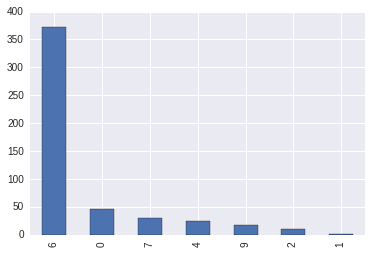

In [37]:
p = df.topics.value_counts().plot(kind='bar')

## TSNE projection

In [38]:
from tsne import tsne
import mpld3
mpld3.enable_notebook()

In [ ]:
tsnemat = tsne(np.asfarray(dist_vs))

In [40]:
df['x2'] = tsnemat[:,0]
df['y2'] = tsnemat[:,1]

df.head()

,names,sims,topics,x2,y2
0,phụ_nữ,1.000000,7,10.604108,8.923465
1,đàn_ông,0.856764,7,30.793258,0.882965
2,nam_giới,0.837718,6,-7.984285,-12.970551
3,nữ_giới,0.779708,6,-1.952695,-27.015526
4,tình_dục,0.743693,6,-4.866441,-15.168740


In [52]:
fig, ax = plt.subplots(figsize=(13,13), subplot_kw=dict(axisbg='#EEEEEE'))
elements = []
for topic in range(lda.num_topics):
    scatter = ax.scatter(df[df.topics==topic]['x2'].values,
                         df[df.topics==topic]['y2'].values,
                         c=next(ax._get_lines.color_cycle),
                         s=1000 * df[df.topics==topic]['sims'].values,
                         label=topics_names[topic],
                         alpha=0.6,
                         cmap=plt.cm.get_cmap('rainbow', 10))
    

    labels = list(df[df.topics==topic]['names'].values)
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    elements.append([scatter])
    
    
# plot keyword text
plt.text(df[df.names==key_word]['x2'].values[0], df[df.names==key_word]['y2'].values[0], key_word, ha = 'right', va = 'bottom', size=14)

#set tick marks as blank
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

#set axis as blank
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.grid(color='white', linestyle='')
ax.set_title(u"TSNE: Top 500 words related with {}".format(key_word), size=14) 

mpld3.display() #show the plot
# html = mpld3.fig_to_html(fig)